<a href="https://colab.research.google.com/github/SandeepMLDLNPL/Machine_Learning_Models/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 

###Let's Build a 3d Dataset

In [3]:
np.random.seed(4)
m = 60 
w1,w2 = 0.1,0.3
noise = 0.1 

angles = np.random.rand(m)*3*np.pi/2-0.5
X = np.empty((m,3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

###Principal Components

In [6]:
X_centred = X - X.mean(axis = 0)
U,s,Vt = np.linalg.svd(X_centred)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [13]:
m,n = X.shape
S = np.zeros(X_centred.shape)
S[:n,:n] = np.diag(s)
S[:n,:n]

array([[6.77645005, 0.        , 0.        ],
       [0.        , 2.82403671, 0.        ],
       [0.        , 0.        , 0.78116597]])

In [15]:
np.allclose(X_centred, U.dot(S).dot(Vt))

True

###Projecting Down to d Dimensions

In [16]:
W2 = Vt.T[:,:2]
X2D = X_centred.dot(W2)
X2D_using_svd = X2D

###Using Sikit-Learn
#####With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you:

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D = pca.fit_transform(X)


In [19]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [23]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

#####PCA using Scikit-Learn gives the same projection as the one given by the SVD approach, except both axes are flipped:

In [24]:
np.allclose(X2D,-X2D_using_svd)

True

Recover the 3D points projected on the plane (PCA 2D subspace).

In [25]:
X3D = pca.inverse_transform(X2D)

There was some loss of information while recovering 

In [26]:
np.allclose(X3D,X)

False

In [27]:
np.mean(np.sum(np.square(X3D-X),axis = 1))

0.01017033779284855

The PCA object gives access to the principal components that it computed

In [28]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [29]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

###Explained Variance Ratio

In [30]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

The first dimension explains 84.2% of the variance, while the second explains 14.6%

By projecting down to 2D, we lost about 1.1% of the variance:

In [32]:
1-pca.explained_variance_ratio_.sum()

0.011195535570688975

Here is how to compute the explained variance ratio using the SVD approach (recall that s is the diagonal of the matrix S)

In [33]:
np.square(s)/np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

Swiss Roll Dataset

In [34]:
from sklearn.datasets import make_swiss_roll
X,t = make_swiss_roll(n_samples = 1000,noise = 0.2,random_state = 42)

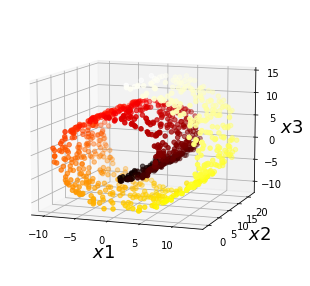

In [36]:
axes = [-11.5,14,-2,23,-12,15]
fig = plt.figure(figsize = (6,5))
ax = fig.add_subplot(111,projection = '3d')
ax.scatter(X[:,0],X[:,1],X[:,2],c=t, cmap = plt.cm.hot)
ax.view_init(10,-70)
ax.set_xlabel('$x1$',fontsize = 18)
ax.set_ylabel('$x2$',fontsize = 18)
ax.set_zlabel('$x3$',fontsize = 18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.show()

Squashing by projecting onto a plane (left) versus unrolling the Swiss roll (right):

In [39]:
X.shape

(1000, 3)

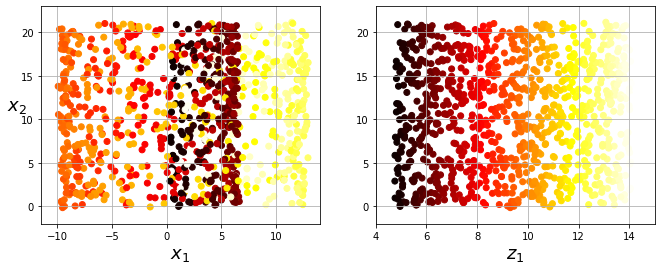

In [40]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

The decision boundary may not always be simpler with lower dimensions:

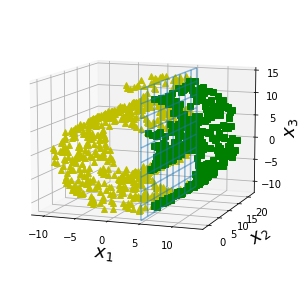

In [41]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]
X2s = np.linspace(axes[2],axes[3],10)
X3s = np.linspace(axes[4],axes[5],10)
x2,x3 = np.meshgrid(X2s,X3s)

fig = plt.figure(figsize= (6,5))
ax = plt.subplot(111,projection = '3d')

positive_class = X[:,0]>5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10,-70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

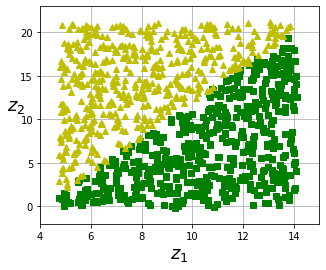

In [43]:
fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

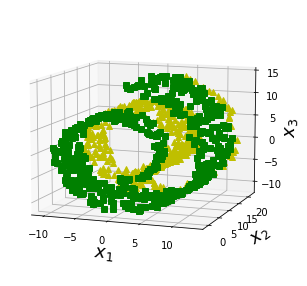

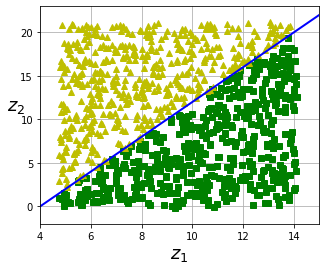

In [44]:
fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

###Choosing the Right Number of Dimensions

In [47]:
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1,as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [50]:
from sklearn.model_selection import train_test_split
X = mnist['data']
y = mnist['target']

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [53]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95)+1

Explained variance as a function of the number of dimensions

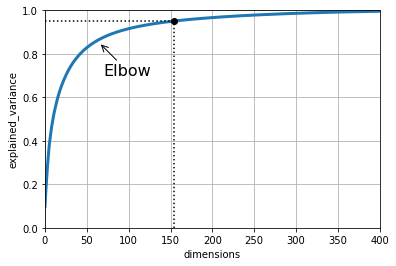

In [64]:
plt.figure(figsize = (6,4))
plt.plot(cumsum,linewidth = 3)
plt.axis([0,400,0,1])
plt.xlabel('dimensions')
plt.ylabel('explained_variance')
plt.plot([d,d],[0,0.95],'k:')
plt.plot([0,d],[0.95,0.95],'k:')
plt.plot(d,0.95,'ko')
plt.annotate('Elbow',xy = (65,0.85),xytext = (70,0.7),
              arrowprops = dict(arrowstyle = "->"),fontsize = 16)
plt.grid(True)
plt.show()

In [65]:
pca = PCA(n_components = 0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

In [66]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557439

###PCA for Compression

In [67]:
pca = PCA(n_components = 154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

###Randomized PCA

In [68]:
rnd_pca = PCA(n_components = 154,svd_solver = "randomized",random_state = 42)
X_reduced = rnd_pca.fit_transform(X_train)
X_reduced

array([[-5.63825594e+02,  3.76211585e+02,  5.47809263e+02, ...,
        -2.65338430e+01,  3.49757836e+01,  5.09185565e+01],
       [-2.47606773e+02,  5.94115813e+02, -7.61176589e+02, ...,
         8.25782712e+01, -2.01359964e+00,  1.26253885e+01],
       [-7.61068948e+01, -7.18886267e+02, -6.21347158e+02, ...,
         7.20428267e+01,  3.34597149e+01,  5.26661081e+01],
       ...,
       [ 4.46897686e+02,  2.00538445e+02, -3.26087854e+02, ...,
        -2.50229406e+01, -1.86528406e+01, -4.60240212e+01],
       [ 7.94828987e+02, -1.64978790e+02,  4.84146892e+01, ...,
        -3.54576665e+01,  3.15203121e+01, -6.48285594e-01],
       [-9.03114239e+02, -4.56076540e+02, -1.39585123e+02, ...,
        -3.08430066e+01, -2.23779276e+01,  3.54949643e+01]])

In [69]:
from sklearn.decomposition import IncrementalPCA
n_batches = 100
inc_pca = IncrementalPCA(n_components = 154)
for X_batch in np.array_split(X_train,n_batches):
  print(".", end="") # not shown in the book
  inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

....................................................................................................